In [1]:
from glob import glob
import numpy as np
import os
from PIL import Image, ImageOps
data_dir = '../data'

In [2]:
labels = os.listdir(data_dir)
print(labels)

['axes', 'boots', 'carabiners', 'crampons', 'gloves', 'hardshell_jackets', 'harnesses', 'helmets', 'insulated_jackets', 'pulleys', 'rope', 'tents']


In [3]:
#configuration
img_width, img_height = 128, 128
batch_size=4

In [4]:
X, y = [], []
for label in labels:
    files = (os.listdir(os.path.join(data_dir,label)))
    for file in files:
        img = Image.open(os.path.join(data_dir, label,file)).convert('RGB')
        width, height = img.size
        if height> width:
            ratio = float(img_height/height)
        else:
            ratio = float(img_width/width)
        new_size = int(width*ratio), int(height*ratio)
        img = img.resize(new_size, Image.ANTIALIAS)
        delta_w = img_width - img.size[0]
        delta_h = img_height - img.size[1]
        padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
        img = ImageOps.expand(img, padding, fill='white')
        data = np.asarray(img)
        X.append(data)
        y.append(labels.index(label))

In [5]:
import random
c = list(zip(X, y))
random.shuffle(c)
X, y = zip(*c)

In [8]:
colors = {}
for idx, x in enumerate(X):
    unique, counts = np.unique(x, return_counts=True)
    dict_ = (dict(zip(unique, counts)))
    if y[idx] not in colors.keys():
        colors[y[idx]] = 0
    if 255 in dict_.keys():
        colors[y[idx]]+=(dict_[255])
print(colors)

{0: 3277128, 1: 2603457, 2: 8583803, 3: 3841970, 4: 4092267, 5: 9818918, 6: 4174152, 7: 2374193, 8: 4531202, 9: 928519, 10: 5585056, 11: 3703631}


['axes', 'boots', 'carabiners', 'crampons', 'gloves', 'hardshell_jackets', 'harnesses', 'helmets', 'insulated_jackets', 'pulleys', 'rope', 'tents']


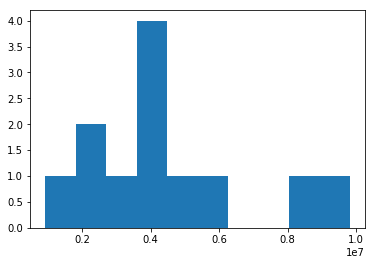

In [17]:
import matplotlib.pyplot as plt
plt.hist(colors.values())
print(labels)

In [ ]:
from keras.utils import np_utils
y = np_utils.to_categorical(y) 

In [10]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import random

# dimensions of our images.
num_classes=len(labels)
X_train = np.array(X)
y_train = np.array(y)
X_train = X_train.reshape(X_train.shape[0], img_width, img_height, 3)
input_shape = (img_width, img_height, 3)
X

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(np.array(X_train)/255, np.array(y_train)/255, validation_split=0.2, nb_epoch=10, batch_size=batch_size, verbose=1)

c:\users\lahulsta\appdata\local\continuum\anaconda3\envs\openhack\lib\site-packages\ipykernel_launcher.py:37: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1697 samples, validate on 425 samples
Epoch 1/10
1697/1697 [==============================] - 14s 8ms/step - loss: 0.0055 - acc: 0.5651 - val_loss: 0.0023 - val_acc: 0.8235
Epoch 2/10
1697/1697 [==============================] - 14s 8ms/step - loss: 0.0023 - acc: 0.8079 - val_loss: 0.0020 - val_acc: 0.8612
Epoch 3/10
1697/1697 [==============================] - 14s 8ms/step - loss: 0.0016 - acc: 0.8674 - val_loss: 0.0013 - val_acc: 0.9059
Epoch 4/10
1697/1697 [==============================] - 15s 9ms/step - loss: 8.5463e-04 - acc: 0.9287 - val_loss: 0.0015 - val_acc: 0.9035
Epoch 5/10
1697/1697 [==============================] - 16s 10ms/step - loss: 6.9606e-04 - acc: 0.9381 - val_loss: 0.0015 - val_acc: 0.9224
Epoch 6/10
1697/1697 [==============================] - 16s 9ms/step - loss: 5.8550e-04 - acc: 0.9523 - val_loss: 0.0012 - val_acc: 0.9200
Epoch 7/10
1697/1697 [==============================] - 16s 10ms/step - loss: 4.9479e-04 - acc: 0.9635 - val_loss: 0.0011 - val_ac

In [14]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

X_train_, X_val = X_train[0:int(len(X_train)*0.8)], X_train[int(len(X_train)*0.8):]
y_train_, y_val = y_train[0:int(len(y_train)*0.8)], y_train[int(len(y_train)*0.8):]

datagen_train = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    preprocessing_function = preprocess_input)

datagen_val = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    preprocessing_function = preprocess_input)


# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen_train.fit(X_train_)
# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen_val.fit(X_val)


# create the base pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(128, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(num_classes, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen_train.flow(X_train_, y_train_, batch_size=batch_size), validation_data=datagen_val.flow(X_val, y_val, batch_size=batch_size),nb_epoch=25)

c:\users\lahulsta\appdata\local\continuum\anaconda3\envs\openhack\lib\site-packages\ipykernel_launcher.py:56: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
c:\users\lahulsta\appdata\local\continuum\anaconda3\envs\openhack\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., epochs=25)`


Epoch 1/25
425/425 [==============================] - 26s 61ms/step - loss: 1.3047 - acc: 0.6100 - val_loss: 1.1946 - val_acc: 0.8118
Epoch 2/25
425/425 [==============================] - 19s 46ms/step - loss: 0.9267 - acc: 0.7124 - val_loss: 1.0934 - val_acc: 0.8047
Epoch 3/25
425/425 [==============================] - 17s 39ms/step - loss: 0.8746 - acc: 0.7441 - val_loss: 1.2226 - val_acc: 0.8518
Epoch 4/25
425/425 [==============================] - 21s 49ms/step - loss: 0.7522 - acc: 0.7782 - val_loss: 1.1822 - val_acc: 0.8565
Epoch 5/25
425/425 [==============================] - 21s 49ms/step - loss: 0.7623 - acc: 0.7747 - val_loss: 0.9256 - val_acc: 0.8776
Epoch 6/25
425/425 [==============================] - 20s 47ms/step - loss: 0.7087 - acc: 0.8024 - val_loss: 1.0988 - val_acc: 0.8471
Epoch 7/25
425/425 [==============================] - 23s 54ms/step - loss: 0.8059 - acc: 0.7800 - val_loss: 1.0667 - val_acc: 0.8541
Epoch 8/25
425/425 [==============================] - 20s 46ms